In [389]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
# Load the data
data_dir = 'C:/Users/Dell/Desktop'
df = pd.read_csv(data_dir + '/winequality-white 2022.csv', sep = ';', skiprows=1,names =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                         "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"] )
df = df[:800]
print(df.shape)
df.head()

(800, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [390]:
# Construct column 'good wine'
df['good wine'] = df['quality'].apply(lambda x: 1 if x>=6 else 0)
df = df.drop(['quality'], axis=1)
df.describe()
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good wine
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [391]:
# Generate Test Set 
Train, Valid, Test = np.split(df, [int(0.5*len(df)), int(0.75*len(df))])
print(Train.shape)
print(Test.shape)

(400, 12)
(200, 12)


In [392]:
# Generate Training and Validation Sets 
X_train, Y_train = Train.iloc[:, :11], Train.iloc[:, -1]
X_valid, Y_valid = Valid.iloc[:, :11], Valid.iloc[:, -1]
X_test, Y_test = Test.iloc[:, :11], Test.iloc[:, -1]
print('Current Training set shape is:', X_train.shape)
print('Current Validation set shape is:', X_valid.shape)
print('Current Testing set shape is:', X_test.shape)

Current Training set shape is: (400, 11)
Current Validation set shape is: (200, 11)
Current Testing set shape is: (200, 11)


In [393]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
395,12.0,0.370,0.76,4.2,0.066,7.0,38.0,1.0004,3.22,0.60,13.0
396,6.6,0.735,0.02,7.9,0.122,68.0,124.0,0.9994,3.47,0.53,9.9
397,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.9988,3.18,0.65,11.0
398,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.9988,3.18,0.65,11.0


In [394]:
# Z-score normalisation for training set, validation set and test set data
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_norm = scaler.fit_transform(X_train)
X_valid_norm = scaler.transform(X_valid)
X_test_norm = scaler.transform(X_test)
X_test_norm

array([[-1.27572411e-01,  2.13328185e+00, -1.77263671e-02, ...,
        -3.00557978e-01, -1.02722585e+00, -5.38116886e-04],
       [ 2.64272968e+00, -4.68542889e-01,  1.17196270e+00, ...,
        -1.33251670e+00, -6.28044822e-01, -1.07677189e+00],
       [-4.04602620e-01,  1.67581816e+00, -1.30259056e+00, ...,
        -4.25682973e-02, -8.05458613e-01, -7.53901758e-01],
       ...,
       [ 4.81894049e-01, -9.83189540e-01,  7.91262198e-01, ...,
        -4.29552818e-01,  4.80791375e-01,  8.60448901e-01],
       [ 5.37300090e-01, -2.39811044e-01,  3.15386571e-01, ...,
        -1.07065717e-01, -8.05458613e-01,  7.52825524e-01],
       [ 5.37300090e-01, -2.39811044e-01,  3.15386571e-01, ...,
        -1.07065717e-01, -8.05458613e-01,  7.52825524e-01]])

Optimised K is:  15
Optimised accuracy:  0.89


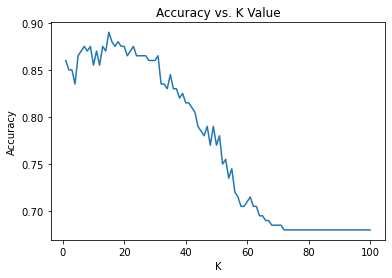

{1: 0.86,
 2: 0.85,
 3: 0.85,
 4: 0.835,
 5: 0.865,
 6: 0.87,
 7: 0.875,
 8: 0.87,
 9: 0.875,
 10: 0.855,
 11: 0.87,
 12: 0.855,
 13: 0.875,
 14: 0.87,
 15: 0.89,
 16: 0.88,
 17: 0.875,
 18: 0.88,
 19: 0.875,
 20: 0.875,
 21: 0.865,
 22: 0.87,
 23: 0.875,
 24: 0.865,
 25: 0.865,
 26: 0.865,
 27: 0.865,
 28: 0.86,
 29: 0.86,
 30: 0.86,
 31: 0.865,
 32: 0.835,
 33: 0.835,
 34: 0.83,
 35: 0.845,
 36: 0.83,
 37: 0.83,
 38: 0.82,
 39: 0.825,
 40: 0.815,
 41: 0.815,
 42: 0.81,
 43: 0.805,
 44: 0.79,
 45: 0.785,
 46: 0.78,
 47: 0.79,
 48: 0.77,
 49: 0.79,
 50: 0.77,
 51: 0.78,
 52: 0.75,
 53: 0.755,
 54: 0.735,
 55: 0.745,
 56: 0.72,
 57: 0.715,
 58: 0.705,
 59: 0.705,
 60: 0.71,
 61: 0.715,
 62: 0.705,
 63: 0.705,
 64: 0.695,
 65: 0.695,
 66: 0.69,
 67: 0.69,
 68: 0.685,
 69: 0.685,
 70: 0.685,
 71: 0.685,
 72: 0.68,
 73: 0.68,
 74: 0.68,
 75: 0.68,
 76: 0.68,
 77: 0.68,
 78: 0.68,
 79: 0.68,
 80: 0.68,
 81: 0.68,
 82: 0.68,
 83: 0.68,
 84: 0.68,
 85: 0.68,
 86: 0.68,
 87: 0.68,
 88: 0.68,
 

In [395]:
# Load KNN with classifiers k = 1, 2,..., 100
# Find optimised classifier k with highest accuracy(i.e.metric selected: accuracy_score)
predict_dict = dict()
for k in range(1, 101):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_norm, Y_train)
    prediction_valid = neigh.predict(X_valid_norm)
    predict_dict[k] = accuracy_score(prediction_valid, Y_valid)
K_1st = max(predict_dict, key=predict_dict.get)

print('Optimised K is: ', K_1st)
print('Optimised accuracy: ', predict_dict[K_1st])

x, y = zip(*predict_dict.items())
plt.plot(x, y)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value')
plt.show()
predict_dict

In [396]:
# Test performance on Test set
# Find generalisation error
neigh_1st = KNeighborsClassifier(n_neighbors=K_1st)
neigh_1st.fit(X_train, Y_train)
predic_1st_test = neigh_1st.predict(X_test)
print('Generalisation error is: ', 1 - accuracy_score(predic_1st_test, Y_test))
print(classification_report(predic_1st_test, Y_test))
print(confusion_matrix(predic_1st_test, Y_test))

Generalisation error is:  0.06499999999999995
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       198
           1       0.08      0.50      0.13         2

    accuracy                           0.94       200
   macro avg       0.54      0.72      0.55       200
weighted avg       0.99      0.94      0.96       200

[[186  12]
 [  1   1]]


Optimised K is:  1
Optimised accuracy:  0.85


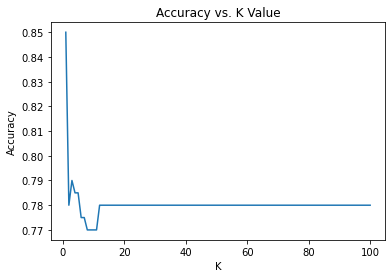

Generalisation error is:  0.15000000000000002
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       333
           1       0.55      0.63      0.58        67

    accuracy                           0.85       400
   macro avg       0.73      0.76      0.75       400
weighted avg       0.86      0.85      0.85       400

[[298  35]
 [ 25  42]]


{1: 0.85,
 2: 0.78,
 3: 0.79,
 4: 0.785,
 5: 0.785,
 6: 0.775,
 7: 0.775,
 8: 0.77,
 9: 0.77,
 10: 0.77,
 11: 0.77,
 12: 0.78,
 13: 0.78,
 14: 0.78,
 15: 0.78,
 16: 0.78,
 17: 0.78,
 18: 0.78,
 19: 0.78,
 20: 0.78,
 21: 0.78,
 22: 0.78,
 23: 0.78,
 24: 0.78,
 25: 0.78,
 26: 0.78,
 27: 0.78,
 28: 0.78,
 29: 0.78,
 30: 0.78,
 31: 0.78,
 32: 0.78,
 33: 0.78,
 34: 0.78,
 35: 0.78,
 36: 0.78,
 37: 0.78,
 38: 0.78,
 39: 0.78,
 40: 0.78,
 41: 0.78,
 42: 0.78,
 43: 0.78,
 44: 0.78,
 45: 0.78,
 46: 0.78,
 47: 0.78,
 48: 0.78,
 49: 0.78,
 50: 0.78,
 51: 0.78,
 52: 0.78,
 53: 0.78,
 54: 0.78,
 55: 0.78,
 56: 0.78,
 57: 0.78,
 58: 0.78,
 59: 0.78,
 60: 0.78,
 61: 0.78,
 62: 0.78,
 63: 0.78,
 64: 0.78,
 65: 0.78,
 66: 0.78,
 67: 0.78,
 68: 0.78,
 69: 0.78,
 70: 0.78,
 71: 0.78,
 72: 0.78,
 73: 0.78,
 74: 0.78,
 75: 0.78,
 76: 0.78,
 77: 0.78,
 78: 0.78,
 79: 0.78,
 80: 0.78,
 81: 0.78,
 82: 0.78,
 83: 0.78,
 84: 0.78,
 85: 0.78,
 86: 0.78,
 87: 0.78,
 88: 0.78,
 89: 0.78,
 90: 0.78,
 91: 0.78,
 92:

In [397]:
# Redo steps 4 to 7 under new splitting
Train, Valid, Test = np.split(df, [int(0.25*len(df)), int(0.50*len(df))])

X_train, Y_train = Train.iloc[:, :11], Train.iloc[:, -1]
X_valid, Y_valid = Valid.iloc[:, :11], Valid.iloc[:, -1]
X_test, Y_test = Test.iloc[:, :11], Test.iloc[:, -1]

scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_valid_norm = scaler.transform(X_valid)
X_test_norm = scaler.transform(X_test)

predict_dict = dict()
for k in range(1, 101):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_norm, Y_train)
    prediction_valid = neigh.predict(X_valid_norm)
    predict_dict[k] = accuracy_score(prediction_valid, Y_valid)
new_K_1st = max(predict_dict, key=predict_dict.get)
print('Optimised K is: ', new_K_1st)
print('Optimised accuracy: ', predict_dict[new_K_1st])

x, y = zip(*predict_dict.items())
plt.plot(x, y)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value')
plt.show()

new_neigh_1st = KNeighborsClassifier(n_neighbors=new_K_1st)
new_neigh_1st.fit(X_train_norm, Y_train)
new_predic_1st_test = new_neigh_1st.predict(X_test_norm)
print('Generalisation error is: ', 1 - accuracy_score(new_predic_1st_test, Y_test))
print(classification_report(new_predic_1st_test, Y_test))
print(confusion_matrix(new_predic_1st_test, Y_test))
predict_dict

In [313]:
# Insight:  ? ? ?